In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline  import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score
import matplotlib.pyplot as plt
import warnings


In [45]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [46]:
car_details = pd.read_csv('Data/carData.csv')
car_details.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
car_details.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [48]:
X = car_details.drop(columns=['Car_Name','Selling_Price'])
Y = car_details['Selling_Price']
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


Best model is  LinearRegression()
Training r2 score:  0.8871508678194377
Test Set r2 score:  0.8504336649861141


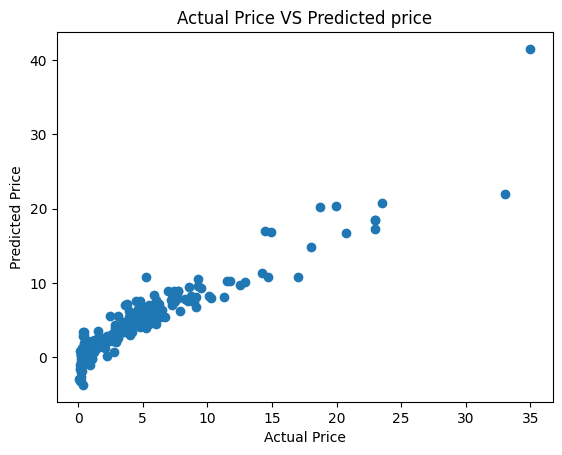

In [54]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns
scalar = StandardScaler()
encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ('StandardScaler',scalar,num_cols),
    ('OneHotEncoder',encoder,cat_cols)
])


pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', LinearRegression())
])

param_grid = [
    {'model':[LinearRegression()]},
    {'model':[Lasso()],'model__alpha': [0.1,1.0,10.0]}
]

grid_search = GridSearchCV(pipeline,param_grid,scoring='r2')
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

grid_search.fit(X_train,Y_train)
best_model = grid_search.best_estimator_
Y_train_pred=best_model.predict(X_train)
Y_test_pred=best_model.predict(X_test)
print('Best model is ',grid_search.best_params_['model'])
print('Training r2 score: ',r2_score(Y_train,Y_train_pred))
print('Test Set r2 score: ',r2_score(Y_test,Y_test_pred))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title('Actual Price VS Predicted price')
plt.show()







